## Задание

#### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.



---------
a) временной ряд, так есть зависимость от времени (правда там отрезки времени будут как минимум не менее дня)

б) тоже временной ряд. Он будет ограниченный полетом времени, но тем не менее есть зависмость начиная от точки начала движения до точки остановки (отрезки времени уже будут не более часа, а скорее минуты, секунды)

в) не временной ряд, так как нет зависимости от времени. Если бы был показатель количество отказов в течение работы компьютера и отмеряемые каждый период времени, тогда был бы временной ряд.

г) не временной ряд. но если будем брать число обращений например за каждый день, то будет временной

д) временной ряд, так как у нас измеряются координаты в зависмости от времени движения

е) временной ряд, так как это видеофиксация что по сути то же зависит от времени

-----

#### __2.__ Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
#print(os.listdir())

In [14]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head(25)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


In [3]:
# data = pd.read_csv('DUQ_hourly.csv')
# data.head()

In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


C:\Users\karas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

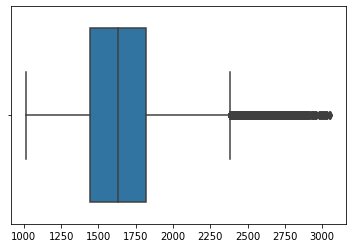

In [5]:
sns.boxplot(data.values)

In [6]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

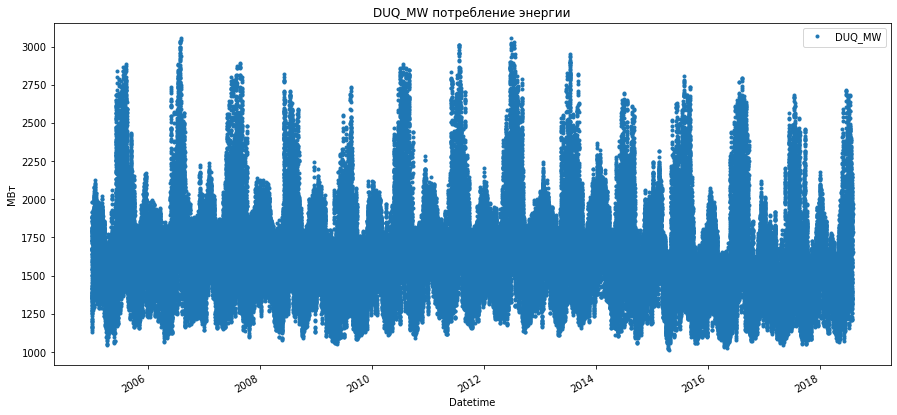

In [7]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

------

** Интересный инструмент для формирования описания данных по признакам из таблиц pandas_profiling. 
Пример подключения приведен ниже, следующие ячейки импорт модуля и формирование отчета

In [8]:
# !pip install pandas_profiling

In [10]:
import pandas_profiling

In [11]:
pandas_profiling.ProfileReport(data)
# prof = pandas_profiling.ProfileReport(data) 
# prof.to_file(output_file='output1.html')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Поскольку данные лежат в диапазоне от 1014 МВт до 3054, то очевидно, что точность представления float64 избыточна. Перейдем к целым. Это позволит сократить объем занимаемой памяти.

In [54]:
# Теперь целые
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   DUQ_MW  119068 non-null  int32 
 1   date    119068 non-null  object
dtypes: int32(1), object(1)
memory usage: 2.3+ MB


из анализа выше мы видим что уникальных значений дат 119064 при 119068 записей всего, то есть есть 4 повторяющиеся записи

In [53]:
count_data = data.index.value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

Похоже что это перевод стрелок осенний

-------


Проверим полноту заполнения на каждый день

In [55]:
data['date'] = data.index.date
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31
2005-12-31 02:00:00,1377,2005-12-31
2005-12-31 03:00:00,1351,2005-12-31
2005-12-31 04:00:00,1336,2005-12-31
2005-12-31 05:00:00,1356,2005-12-31


In [56]:
ddata = data.resample("D").count()
ddata.head()

,DUQ_MW,date
Datetime,,
2005-01-01,23,23
2005-01-02,24,24
2005-01-03,24,24
2005-01-04,24,24
2005-01-05,24,24


In [57]:
ddata['date'] = ddata.index.date
ddata.head()

,DUQ_MW,date
Datetime,,
2005-01-01,23,2005-01-01
2005-01-02,24,2005-01-02
2005-01-03,24,2005-01-03
2005-01-04,24,2005-01-04
2005-01-05,24,2005-01-05


In [60]:
ddata.sort_values('DUQ_MW').head()

,DUQ_MW,date
Datetime,,
2018-08-03,1,2018-08-03
2006-04-02,23,2006-04-02
2006-10-29,23,2006-10-29
2007-03-11,23,2007-03-11
2007-11-04,23,2007-11-04


In [61]:
data.sort_index().tail()

,DUQ_MW,date
Datetime,,
2018-08-02 20:00:00,1966,2018-08-02
2018-08-02 21:00:00,1944,2018-08-02
2018-08-02 22:00:00,1901,2018-08-02
2018-08-02 23:00:00,1789,2018-08-02
2018-08-03 00:00:00,1656,2018-08-03


2018-08-03	одно значение потому что в этот день заканчивается ряд

------

остальные где меньше 24 значений в день:

In [58]:
dds = ddata.sort_values('DUQ_MW')
shortlist = list(dds.loc[(dds['DUQ_MW'] < 24) & (dds['DUQ_MW'] > 1),'date'])
# print(shortlist)
for i in shortlist:
    print(data[data['date'] == i])

                     DUQ_MW        date
Datetime                               
2006-04-02 01:00:00    1258  2006-04-02
2006-04-02 02:00:00    1221  2006-04-02
2006-04-02 04:00:00    1182  2006-04-02
2006-04-02 05:00:00    1180  2006-04-02
2006-04-02 06:00:00    1193  2006-04-02
2006-04-02 07:00:00    1206  2006-04-02
2006-04-02 08:00:00    1225  2006-04-02
2006-04-02 09:00:00    1308  2006-04-02
2006-04-02 10:00:00    1352  2006-04-02
2006-04-02 11:00:00    1361  2006-04-02
2006-04-02 12:00:00    1386  2006-04-02
2006-04-02 13:00:00    1412  2006-04-02
2006-04-02 14:00:00    1409  2006-04-02
2006-04-02 15:00:00    1379  2006-04-02
2006-04-02 16:00:00    1384  2006-04-02
2006-04-02 17:00:00    1396  2006-04-02
2006-04-02 18:00:00    1403  2006-04-02
2006-04-02 19:00:00    1378  2006-04-02
2006-04-02 20:00:00    1427  2006-04-02
2006-04-02 21:00:00    1529  2006-04-02
2006-04-02 22:00:00    1497  2006-04-02
2006-04-02 23:00:00    1425  2006-04-02
2006-04-02 00:00:00    1302  2006-04-02


Идут пропуски по одному в день в один весенний и один осенний день в году (осенний кроме 2014 - 2016 годов когда осенью наоборот повтор значений). Очевидно что эти пропуски связаны с переводом стрелок только до 2014 года осенью тоже вместо дополнительных значений на всякий случай пропускали тоже время когда переводили стрелки.
Пропуски весной в 2 часа ночи, а осенью в 3.

-----

####  3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.



In [63]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(10)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
2019-08-26,58.26
2019-08-25,57.81
2019-08-23,58.94
2019-08-22,60.05


In [64]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [65]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [66]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

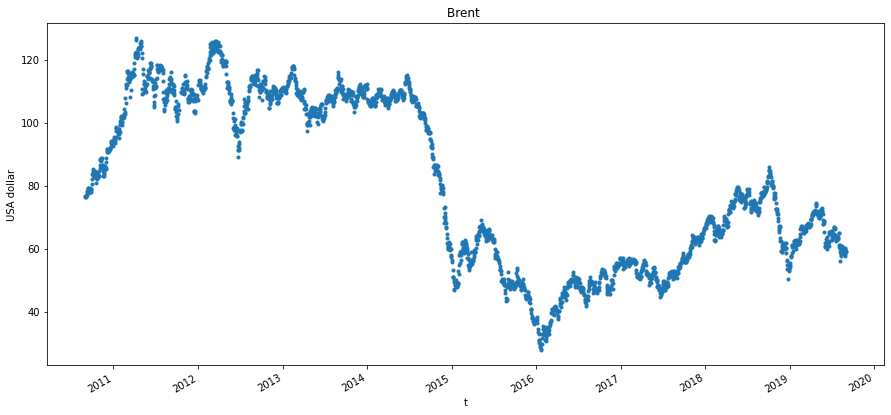

In [67]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Рис.3 Цена нефти с 2010 по 2019

In [68]:
brent_data_w = brent_data.resample("W").mean()
brent_data_w.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


Text(0.5, 0, 'week')

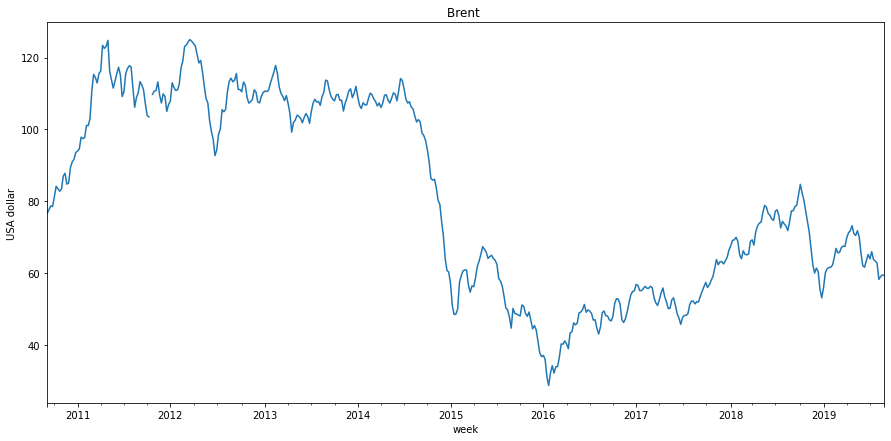

In [70]:
brent_data_w['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('week')

In [72]:
brent_data_m = brent_data.resample("M").mean()
brent_data_m.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


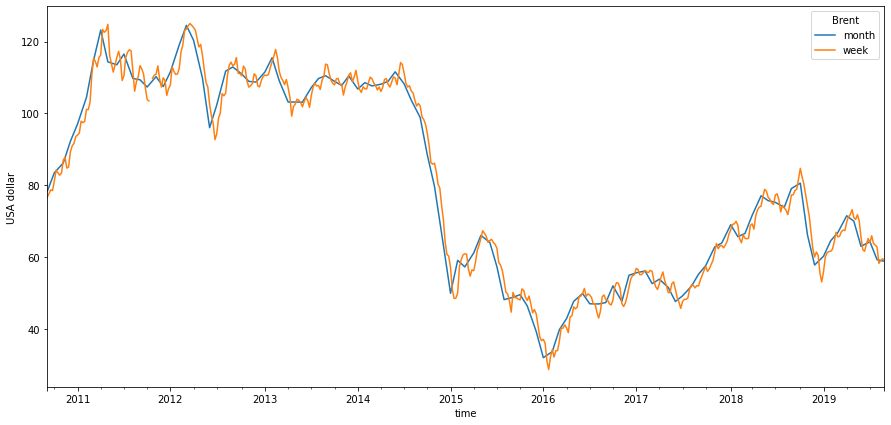

In [77]:
brent_data_m['Значение'].plot(figsize=( 15, 7 ), label='month')
brent_data_w['Значение'].plot(figsize=( 15, 7 ), label='week')
plt.ylabel('USA dollar')
plt.xlabel('time')
plt.legend(title='Brent', loc='upper right')

plt.show()

#### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных  b годовых группах для Brent.



In [81]:
brent_data_y = brent_data.resample("Y").mean()
brent_data_w_std = brent_data.resample("W").std()
brent_data_m_std = brent_data.resample("M").std()
brent_data_y_std = brent_data.resample("Y").std()

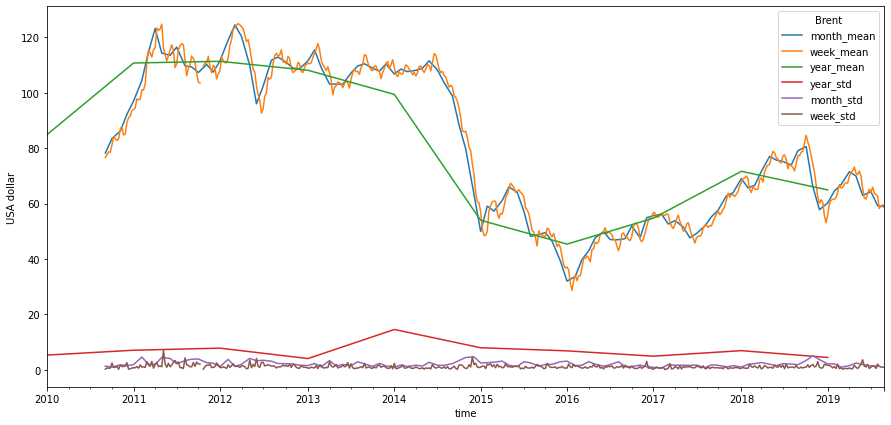

In [82]:
brent_data_m['Значение'].plot(figsize=( 15, 7 ), label='month_mean')
brent_data_w['Значение'].plot(figsize=( 15, 7 ), label='week_mean')
brent_data_y['Значение'].plot(figsize=( 15, 7 ), label='year_mean')
brent_data_y_std['Значение'].plot(figsize=( 15, 7 ), label='year_std')
brent_data_m_std['Значение'].plot(figsize=( 15, 7 ), label='month_std')
brent_data_w_std['Значение'].plot(figsize=( 15, 7 ), label='week_std')
plt.ylabel('USA dollar')
plt.xlabel('time')
plt.legend(title='Brent', loc='upper right')

plt.show()

#### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Ресемлинг по среднему значению сглаживает графики. Чем по большему периоду ресемплинг - больше сглаживание.

Если смотреть построенные графики на одном то видно что также просихходит смещение влево, но это связано с тем что среднее значение по неделе, месяцу и году, ставится на первый день недели, месяца, года 

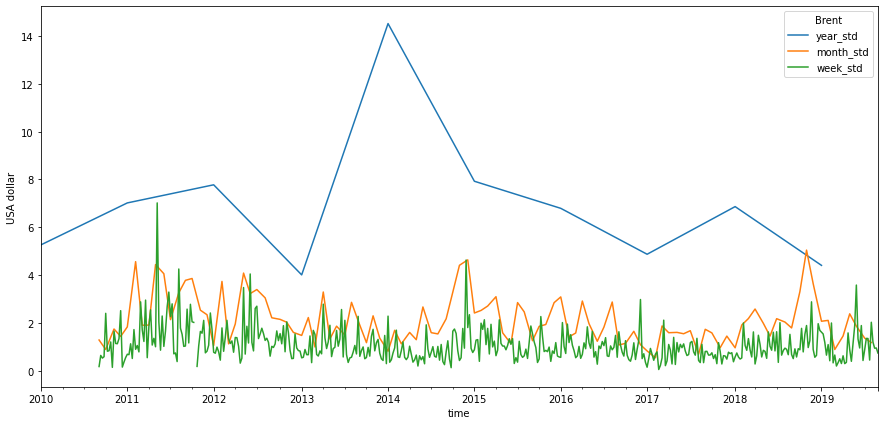

In [83]:
brent_data_y_std['Значение'].plot(figsize=( 15, 7 ), label='year_std')
brent_data_m_std['Значение'].plot(figsize=( 15, 7 ), label='month_std')
brent_data_w_std['Значение'].plot(figsize=( 15, 7 ), label='week_std')
plt.ylabel('USA dollar')
plt.xlabel('time')
plt.legend(title='Brent', loc='upper right')

plt.show()

Среднее отклонение находится ближе к нулевой отметке что объяснимо так как наблюдения зависимы и сильно не меняются во времени.

Конечно отклонение по году имеет гораздо большее значение чем по месяцу или по неделе, что объясняется тем что в течение года разброс значений существенно больше чем в течение месяца (и тем более недели)